In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

이미지 경로: haerin.jpg
파일 존재 여부: True


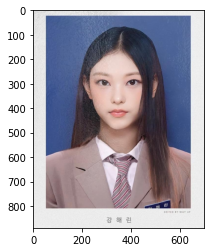

In [2]:
# 이미지 경로 설정
my_image_path = "haerin.jpg"

# 경로 확인 및 파일 존재 여부 확인
print(f"이미지 경로: {my_image_path}")
print(f"파일 존재 여부: {os.path.exists(my_image_path)}")

# 이미지 읽기
img_bgr = cv2.imread(my_image_path)

# 이미지가 정상적으로 불러와졌는지 확인
if img_bgr is None:
    print("이미지를 불러올 수 없습니다. 경로를 다시 확인하세요:", my_image_path)
else:
    # BGR을 RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_show = img_bgr.copy()

    # 이미지 출력
    plt.imshow(img_rgb)
    plt.show()

# 얼굴 검출

rectangles[[(241, 242) (464, 464)]]


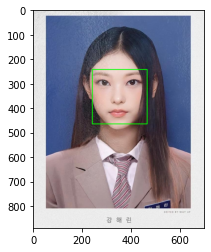

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   # 얼굴 영역을 잡아서 영역 출력

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 검출

68


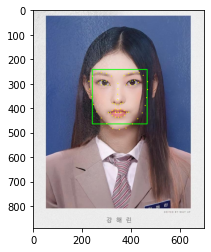

In [4]:
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크의 위치를 저장할 list 생성   
list_landmarks = []
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 얼굴에서 68개의 랜드마크를 모두 검출하면 68 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

(x,y) : (304,297)
(w,h) : (224,224)
(112, 112, 3)
(112, 112, 3)


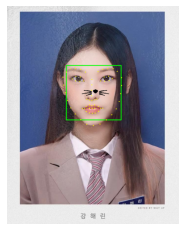

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[35][0] - 61
    y = landmark[53][1] - dlib_rect.width()//2
    
    w = h = dlib_rect.width()
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = "cat-whiskers.png" # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w // 2,h // 2))
print (img_sticker.shape)

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 숨기기
plt.show()

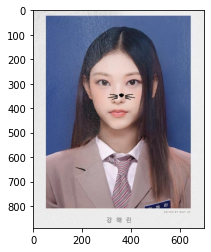

In [6]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()